<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1TyooF3dWsfH-U9u8Bp4g-jIZW1ufaD8C')

     |████████████████████████████████| 71kB 2.8MB/s 


### Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Make submissions here:  https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project

This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). For the course project, you will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project (you can also start with an empty new notebook). Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations whererver possible using Markdown cells.

#### Step 1: Select a real-world dataset 

- Find and download an interesting real-world dataset (see the Recommended Datasets section below for ideas). 

- The dataset should contain tabular data (rowsn & columns), preferably in CSV/JSON/XLS or other formats that can be read using Pandas. If it's not in a compatible format, you may have to write some code to convert it to a desired format.
- The dataset should contain at least 3 columns and 150 rows of data. You can also combine data from multiple sources to create a large enough dataset.


#### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


#### Step 3: Perform exploratory Analysis & Visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

#### Step 4: Ask & answer questions about the data

- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


#### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


#### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684

- Browse through projects shared by other participants and give feedback


#### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml



### Recommended Datasets


Use the following resources for finding interesting datasets:

- [Recommended datasets for the course project](https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets)
- [Google Dataset Search](https://datasetsearch.research.google.com)
- [Your personal data from online services](https://www.popsci.com/download-digital-personal-information/)



### Example Projects

Refer to these projects for inspiration:

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis) 

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)


### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 5 questions about the dataset
* Your submission must include at least 5 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Analyzing the Android App Store

Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about [the course](http://zerotopandas.com), and what you've learned from it.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [2]:
project_name = "analyzing-the-android-app-store" # change this

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [9]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Data Preparation and Cleaning

TODO

---



```
# This is formatted as code
```



In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1A0Eu8KuHG8ZHi7qufUy9nNdA0yArEIor3_2Yv3RYZ2I/export?gid=0&format=csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


When plotting graph for Category against Type, found that there was a type `0`. However, only `Free` and `Paid` were expected. Hence, cleaned that entry using Pandas.

In [7]:
# First find out the rows which have incorrect data for `Type`
fix_this_row = df.loc[df['Type'] == "0"]
# Convert the dataframe to list for easy operation
list_to_fix = fix_this_row.values.tolist()
# As there is only one wrong we, pick it using the 0th index, and add `Not Found` in Category (as that is the actual missing info)
list_to_fix[0].insert(1, "Not Found")
# remove the last element from the list as one element has been added in between
list_to_fix[0].pop(-1)

nan

In [10]:
# set the updated value for the row
df.loc[10472] = list_to_fix[0]
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        Not Found
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [11]:
# check if there are discrepencies in rating data
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [13]:
# fill the nan values with 0 to make the column numeric. 
# 0 is a value we can ignore later on as well, because no app can have 0 ratings
df.Rating = df.Rating.fillna(0)
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837      5
10838      0
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: object

In [21]:
# Add the Ratings columns to a list
# if a rating is 0, (which was nan until the previous operation) set the round rating to `Not Found`
# else calculate round off rating
ratings = df.Rating.values.tolist()
round_off_rating = []
for rating in ratings:
  # print(round(float(rating)))
  if not rating:
    rating = "Not Found"
    round_off_rating.append(rating)
  else:
    rating = round(float(rating))
    round_off_rating.append(rating)

# Add a new column with Round Off ratings to the dataframe
df["Round Rating"] = round_off_rating
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4


In [15]:
# make the Installs column to numeric (int)
df.Installs = df['Installs'].replace({'\+': ''}, regex=True)
df.Installs = df['Installs'].replace({',': ''}, regex=True)

df.Installs = df.Installs.astype(int)
df.Installs

TypeError: ignored

In [16]:
# make the Price numeric (float)
df.Price = df['Price'].replace({'\$': ''}, regex=True)
df.Price = df.Price.astype(float)
df.Price.unique()
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [17]:
# convert the last update column to datetime
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [18]:
# check if any columns have nan value
for key in df:
  print("KEY:", key)
  print(df.loc[df[key].isnull()])
  print("\n")

KEY: App
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


KEY: Category
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


KEY: Rating
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


KEY: Reviews
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


KEY: Size
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


KEY: Installs
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, La

In [19]:
# checking if any meaningful info can be extracted from Android Version
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [23]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Exploratory Analysis and Visualization

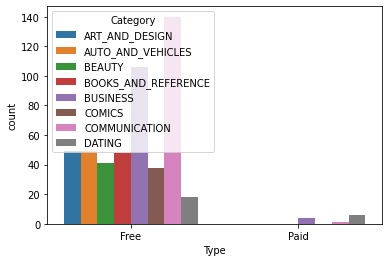

In [61]:
import seaborn as sns
sns.countplot(x="Type", hue="Category", data=df[0:500])

In [62]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4


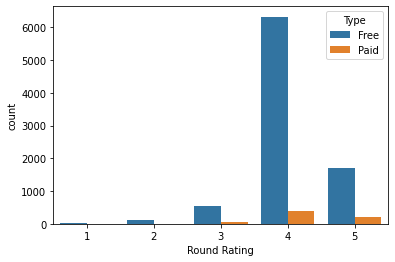

In [66]:
import seaborn as sns
mask = df['Round Rating'].isin(['Not Found'])
sns.countplot(x="Round Rating", hue="Type", data=df[~mask])

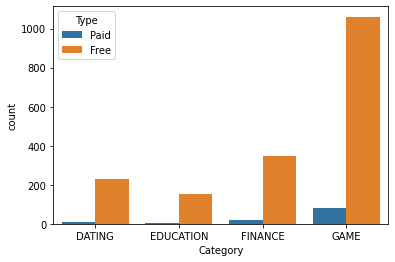

In [67]:
import seaborn as sns
sns.countplot(x="Category", hue="Type", data=df.loc[(df.Category == "EDUCATION") | (df.Category == "FINANCE") | (df.Category == "GAME") | (df.Category == "DATING")])

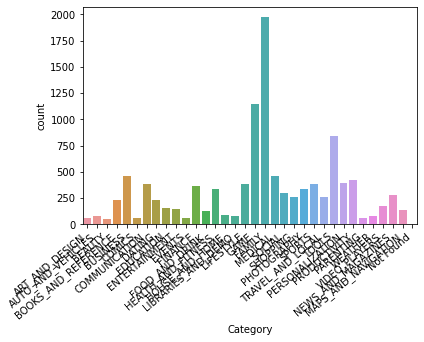

<Figure size 3600x14400 with 0 Axes>

In [68]:
# sns.countplot(y="Category", data=df)

import matplotlib.pyplot as plt


ax = sns.countplot(x="Category", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
plt.figure(figsize=(50,200))
plt.show()

Number of Apps in each Category

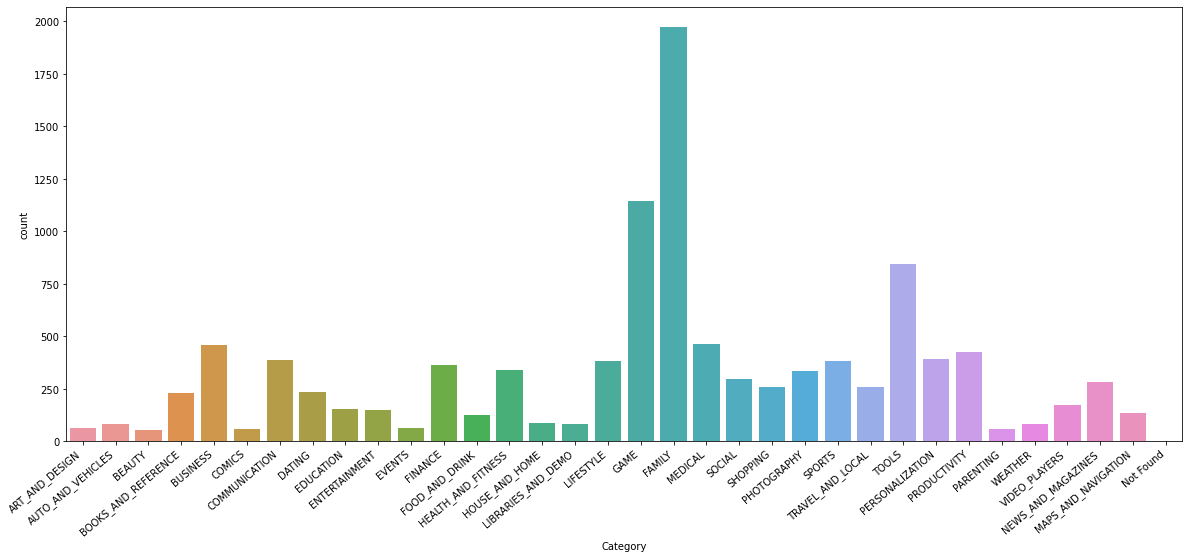

In [88]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

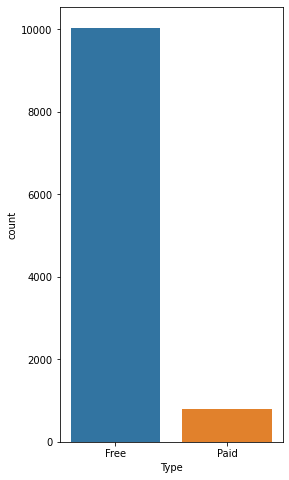

In [95]:
plt.figure(figsize=(4,8))
ax = sns.countplot(x="Type", data=df)
plt.show()

In [96]:
x = df.Category.groupby(df.Type)

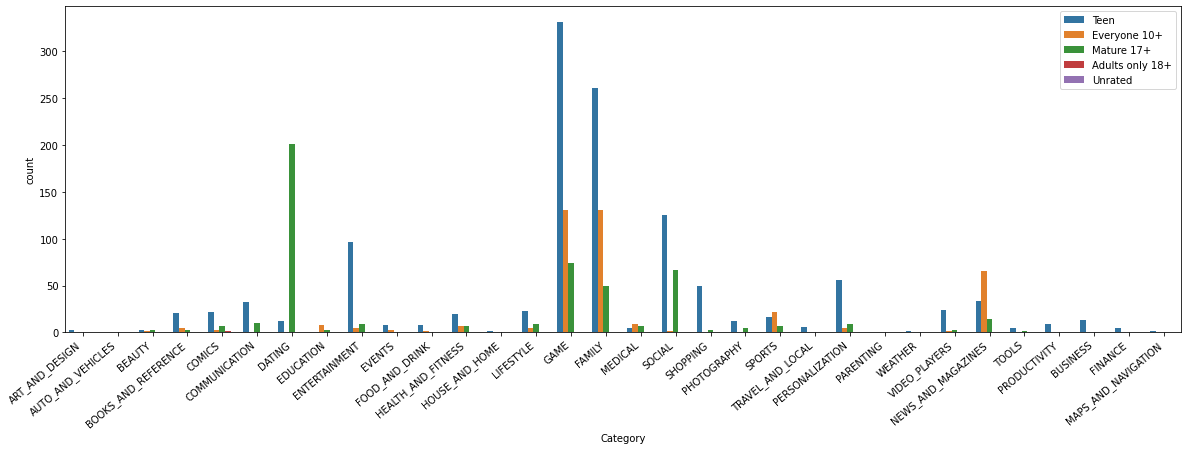

In [118]:
plt.figure(figsize=(20,6))
mask = df['Content Rating'].isin(['Everyone'])
ax = sns.countplot(x="Category", hue="Content Rating", data=df[~mask])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(loc='upper right')
plt.show()

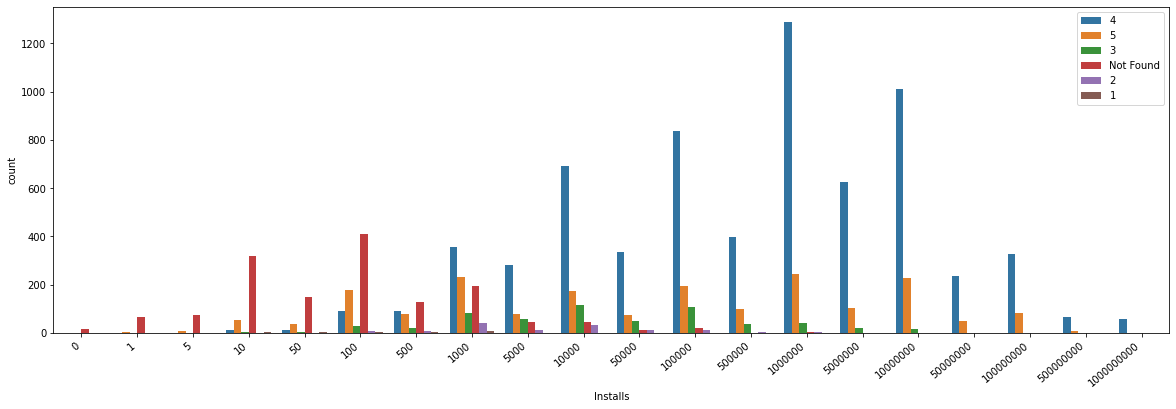

In [121]:
plt.figure(figsize=(20,6))
mask = df['Content Rating'].isin(['Everyone'])
ax = sns.countplot(x="Installs", hue="Round Rating", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(loc='upper right')
plt.show()

In [124]:
dfp = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

import plotly.graph_objects as go

category = list(dfp.Category)
installs = list(dfp.Installs)

fig= go.Figure(go.Treemap(
    
    labels =  category,
    parents=[""]*len(category),
    values =  installs,
    textinfo = "label+percent entry"
))
fig.update_layout(
    autosize=False,
    width= 800,
    height=800,)

fig.show()

In [71]:
for key in x:
  print(key[0], len(key[1]))
  

Free 10040
Paid 800


In [72]:
df.loc[df.Category.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating


In [73]:
import jovian

In [74]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Asking and Answering Questions

TODO

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

TODO

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

### StackOverflow

- [Select specific rows based on column value](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

- [Find NaN values in column](https://stackoverflow.com/a/43831589/7048915)

- [Replace part of value](https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string)

- [How to ignore rows when column values matcha a criteria](https://stackoverflow.com/a/22392870/7048915)

Other Q&A Sources
- [How to fill NaN values in a column](https://www.kite.com/python/answers/how-to-replace-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe-in-python#:~:text=Use%20pandas.,name%20from%20the%20DataFrame%20df%20.)

In [34]:
import jovian

In [125]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'